<a href="https://colab.research.google.com/github/Murcha1990/ML_AI24/blob/main/Lesson10_LogRegAndMetrics/ClassImblanace.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -U imbalanced-learn -q

In [2]:
from imblearn.datasets import fetch_datasets

# Fetch dataset from imbalanced-learn library
# as a dictionary of numpy array
us_crime = fetch_datasets()['us_crime']
us_crime

{'data': array([[0.19, 0.33, 0.02, ..., 0.26, 0.2 , 0.32],
        [0.  , 0.16, 0.12, ..., 0.12, 0.45, 0.  ],
        [0.  , 0.42, 0.49, ..., 0.21, 0.02, 0.  ],
        ...,
        [0.16, 0.37, 0.25, ..., 0.32, 0.18, 0.91],
        [0.08, 0.51, 0.06, ..., 0.38, 0.33, 0.22],
        [0.2 , 0.78, 0.14, ..., 0.3 , 0.05, 1.  ]]),
 'target': array([-1,  1, -1, ..., -1, -1, -1]),
 'DESCR': 'us_crime'}

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Convert the dictionary to a pandas dataframe
crime_df = pd.concat([pd.DataFrame(us_crime['data'], columns = [f'data_{i}' for i in range(us_crime.data.shape[1])]),
           pd.DataFrame(us_crime['target'], columns = ['target'])], axis = 1)

X_train, X_test, y_train, y_test = train_test_split(crime_df.drop('target', axis = 1),
                                                    crime_df['target'],
                                                    test_size = 0.4,
                                                    random_state = 42)

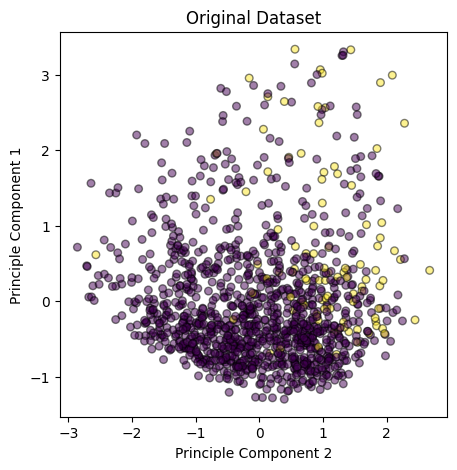

In [4]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Scale the dataset on both train and test sets.
# Note that we fit MinMaxScaler on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
scaler = MinMaxScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Perform PCA Decomposition on both train and test sets
# Note that we fit PCA on X_train only, not on the entire dataset.
# This prevents data leakage from test set to train set.
pca = PCA(n_components=2)
pca.fit(X_train)
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

# Function for plotting dataset
def plot_data(X,y,ax,title):
    ax.scatter(X[:, 0], X[:, 1], c=y, alpha=0.5, s = 30, edgecolor=(0,0,0,0.5))
    ax.set_ylabel('Principle Component 1')
    ax.set_xlabel('Principle Component 2')
    if title is not None:
        ax.set_title(title)

# Plot dataset
fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_pca, y_train, ax, title='Original Dataset')

## Random Oversampling

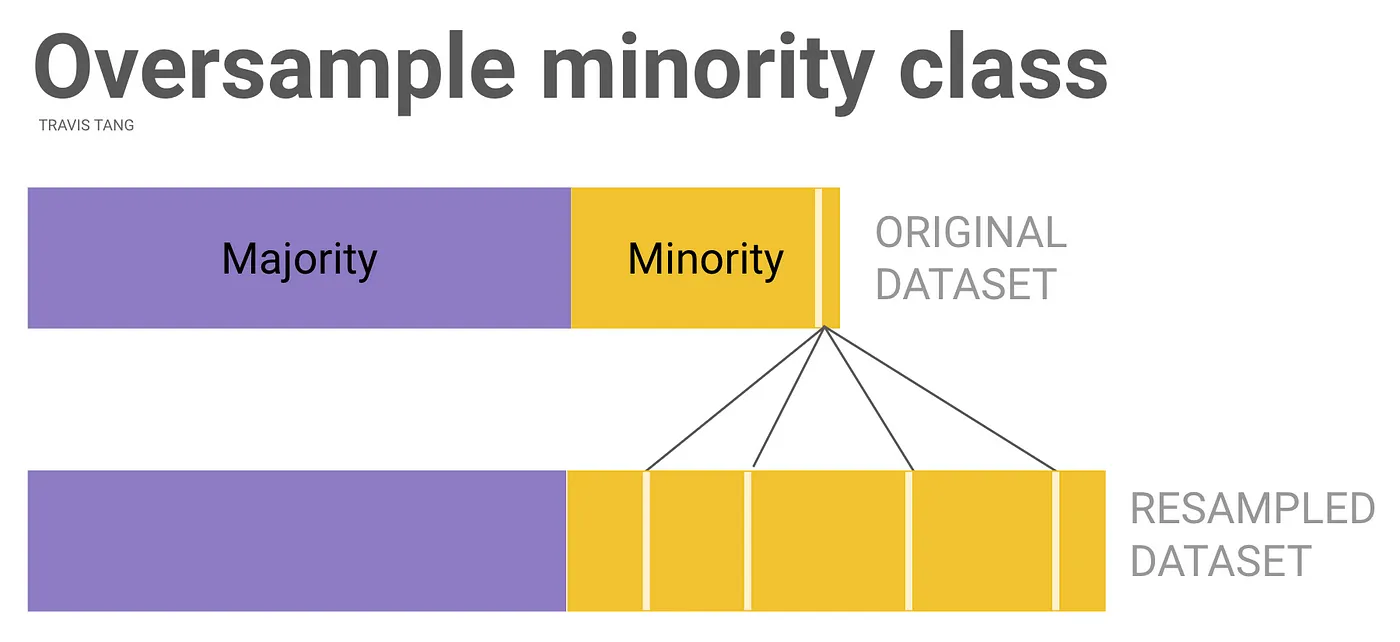

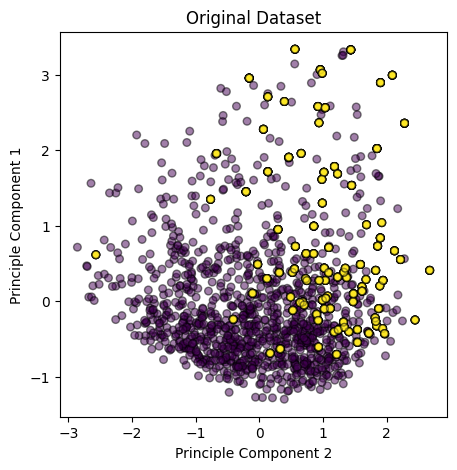

In [6]:
from imblearn.over_sampling import RandomOverSampler

# Perform random oversampling
ros = RandomOverSampler(random_state=0)
X_train_ros, y_train_ros = ros.fit_resample(X_train_pca, y_train)

fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_ros, y_train_ros, ax, title='Original Dataset')

## Random Undersampling

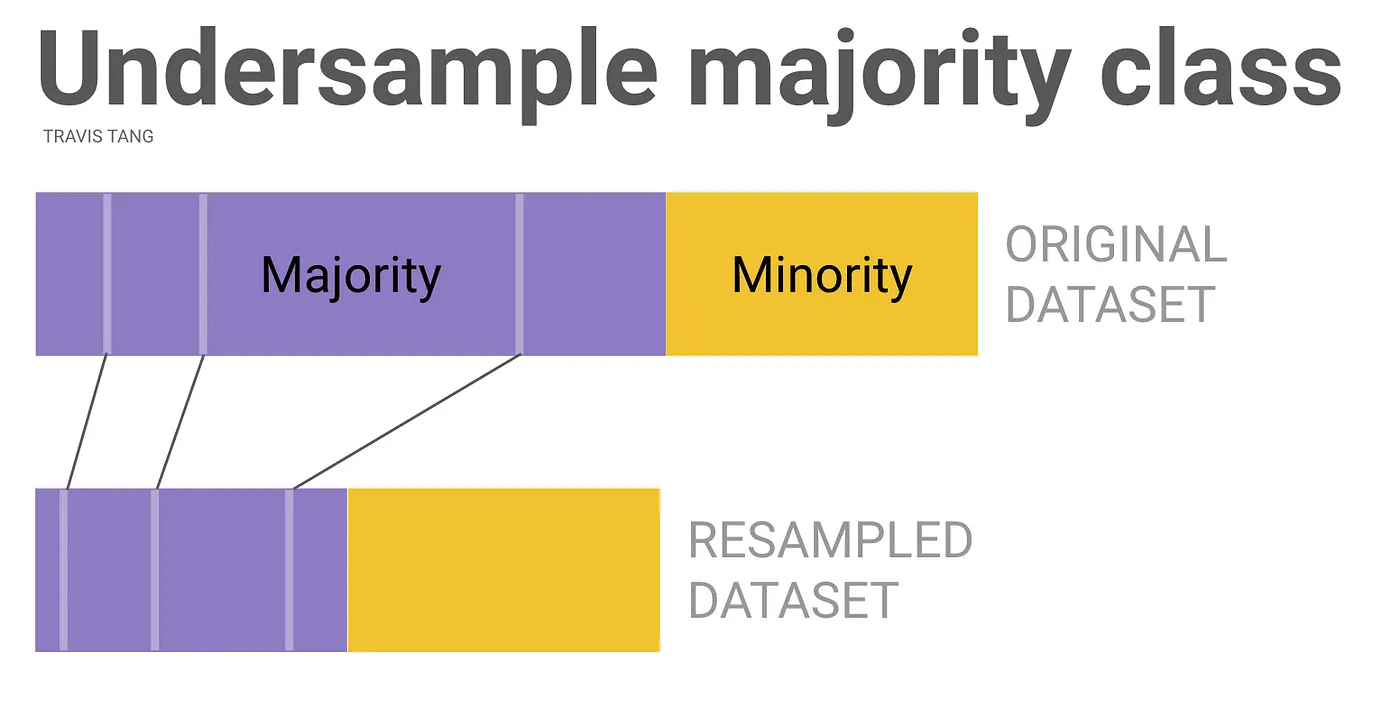

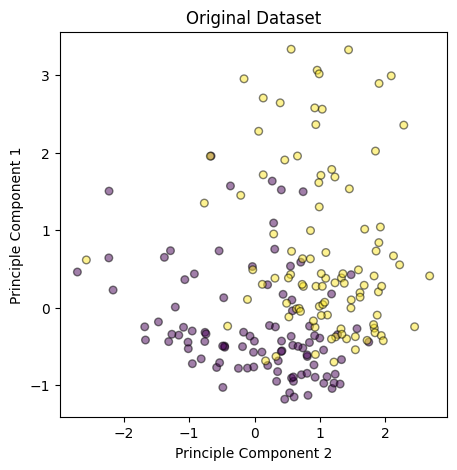

In [7]:
from imblearn.under_sampling import RandomUnderSampler

# Perform random sampling
rus = RandomUnderSampler(random_state=0)
X_train_rus, y_train_rus = rus.fit_resample(X_train_pca, y_train)

fig,ax = plt.subplots(figsize=(5, 5))
plot_data(X_train_rus, y_train_rus, ax, title='Original Dataset')

## Modeling

In [10]:
from sklearn.svm import SVC

# Train SVC on original data
clf = SVC(kernel='linear', probability=True)
clf.fit(X_train_pca, y_train)

# Train SVC on randomly oversampled data
clf_ros = SVC(kernel='linear',probability=True)
clf_ros.fit(X_train_ros, y_train_ros)

# Train SVC on randomly undersampled data
clf_rus = SVC(kernel='linear',probability=True)
clf_rus.fit(X_train_rus, y_train_rus)

SVC(kernel='linear', probability=True)

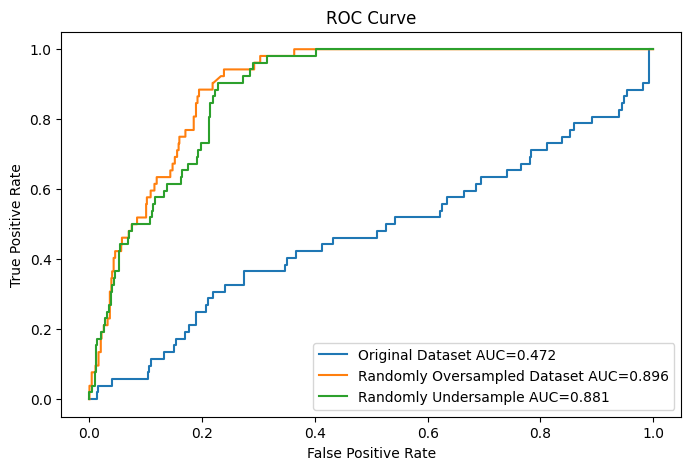

In [13]:
from sklearn import metrics
import matplotlib.pyplot as plt

# Helper function for plotting ROC
def plot_roc(ax, X_train, y_train, X_test, y_test, title):
    clf = SVC(kernel='linear',probability=True)
    clf.fit(X_train, y_train)
    y_test_pred = clf.predict_proba(X_test)[:,1]
    fpr, tpr, thresh = metrics.roc_curve(y_test, y_test_pred)
    auc = metrics.roc_auc_score(y_test, y_test_pred)
    ax.plot(fpr,tpr,label=f"{title} AUC={auc:.3f}")

    ax.set_title('ROC Curve')
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.legend(loc=0)

# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train_pca, y_train, X_test_pca, y_test, 'Original Dataset')
plot_roc(ax, X_train_ros, y_train_ros, X_test_pca, y_test, 'Randomly Oversampled Dataset')
plot_roc(ax, X_train_rus, y_train_rus, X_test_pca, y_test, 'Randomly Undersample')

## SMOTE

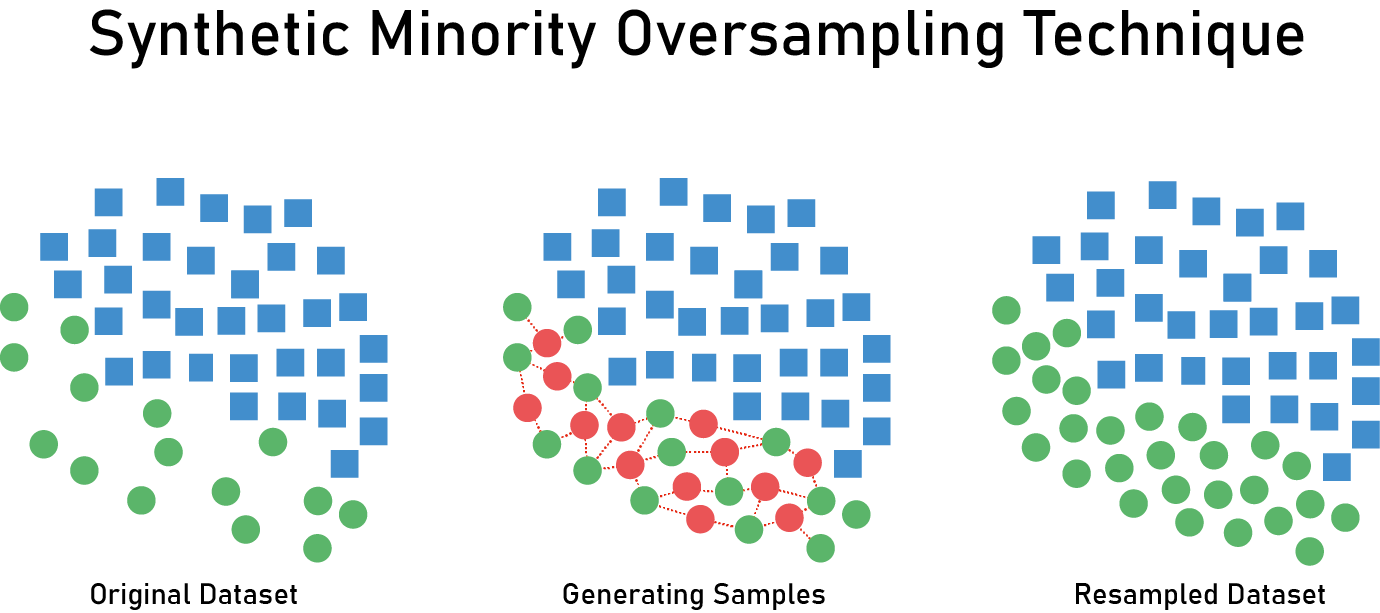

In [20]:
from imblearn.over_sampling import SMOTE

# Perform random sampling
smote = SMOTE(random_state=0)
X_train_smote, y_train_smote = smote.fit_resample(X_train_pca, y_train)

# Train linear SVC
clf_smote = SVC(kernel='linear',probability=True)
clf_smote.fit(X_train_smote, y_train_smote)

SVC(kernel='linear', probability=True)

## ADASYN

ADASYN похож на SMOTE: оба метода генерируют новые объекты при помощи интерполяции.

В чем же разница? ADASYN генерирует объекты рядом с исходными объектами, которые были неверно классифицированы при помощи KNN.

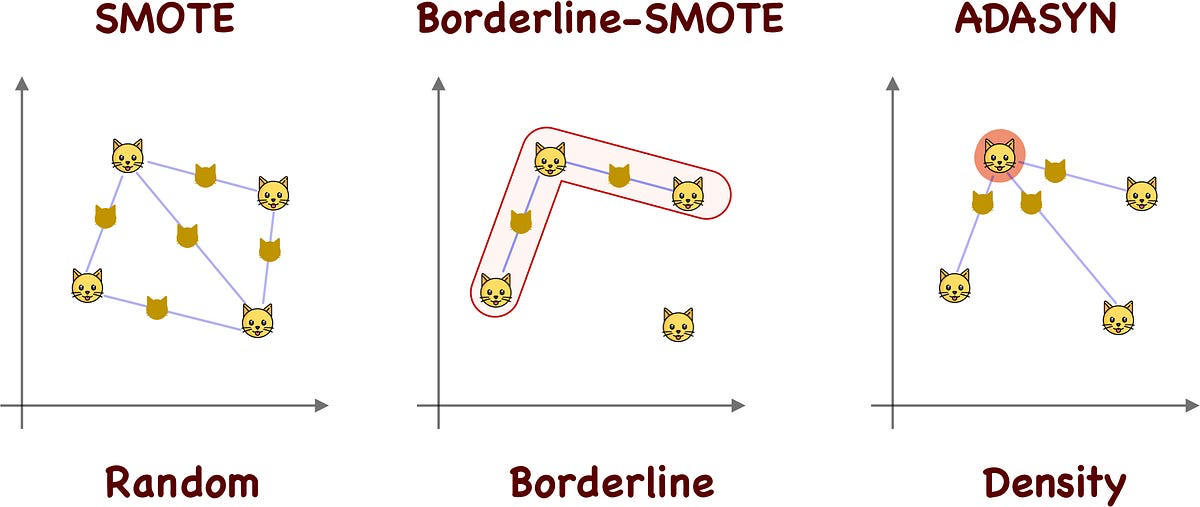

In [22]:
from imblearn.over_sampling import ADASYN

# Perform random sampling
adasyn = ADASYN(random_state=0)
X_train_adasyn, y_train_adasyn = adasyn.fit_resample(X_train_pca, y_train)

clf_adasyn = SVC(kernel='linear',probability=True)
clf_adasyn.fit(X_train_adasyn, y_train_adasyn)

SVC(kernel='linear', probability=True)

## Tomek links

Tomek link - это пара объектов, близких друг другу, но из разных классов.

При undersampling мы удаляем из пар tomek links объекты меньшего класса.

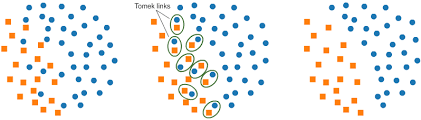

In [17]:
from imblearn.under_sampling import TomekLinks

# Perform Tomek Link undersampling
tomek = TomekLinks()
X_train_tomek, y_train_tomek = tomek.fit_resample(X_train_pca, y_train)

# Train linear SVC
clf_tomek = SVC(kernel='linear',probability=True)
clf_tomek.fit(X_train_tomek, y_train_tomek)

SVC(kernel='linear', probability=True)

## SMOTEK

Oversamping с помощью SMOTE, а затем undersampling при помощи Tomek Links.

In [18]:
from imblearn.combine import SMOTETomek

# Perform random sampling
smotetomek = SMOTETomek(random_state=0)
X_train_smotetomek, y_train_smotetomek = smotetomek.fit_resample(X_train_pca, y_train)

# Plot linear SVC
clf_smotetomek = SVC(kernel='linear',probability=True)
clf_smotetomek.fit(X_train_smotetomek, y_train_smotetomek)

SVC(kernel='linear', probability=True)

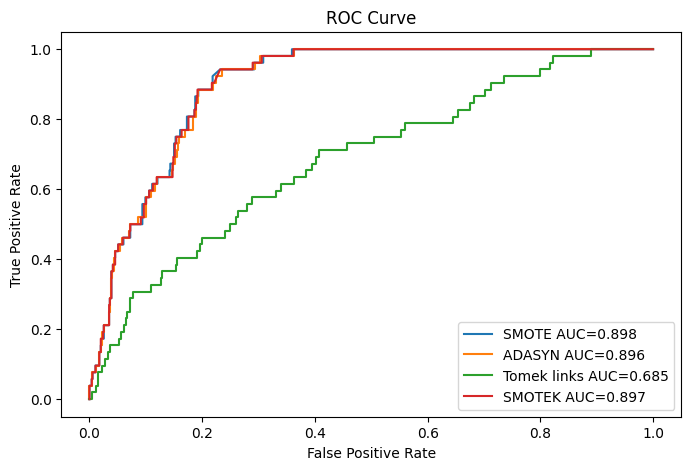

In [21]:
# Plot all ROC into one graph
fig,ax = plt.subplots(1,1,figsize=(8,5))
plot_roc(ax, X_train_smote, y_train_smote, X_test_pca, y_test, 'SMOTE')
plot_roc(ax, X_train_adasyn, y_train_adasyn, X_test_pca, y_test, 'ADASYN')
plot_roc(ax, X_train_tomek, y_train_tomek, X_test_pca, y_test, 'Tomek links')
plot_roc(ax, X_train_smotetomek, y_train_smotetomek, X_test_pca, y_test, 'SMOTEK')

## Class weights

In [15]:
# Train SVC on randomly undersampled data
clf_bal = SVC(kernel='linear', class_weight='balanced', probability=True)
clf_bal.fit(X_train, y_train)

y_test_pred = clf_bal.predict_proba(X_test)[:,1]
print(metrics.roc_auc_score(y_test, y_test_pred))

0.9050448546091977
